In [17]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score #Confusion matrix 수업 때 진행할 예정 
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score#임포트 
import numpy as np
import pandas as pd

df = pd.read_csv("salary_class.csv")
df.isnull().sum()

Unnamed: 0           0
age                  0
workclass         2799
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
class                0
dtype: int64

In [18]:
df

,Unnamed: 0,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,4,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,48837,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
48838,48838,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
48839,48839,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
48840,48840,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


<AxesSubplot: xlabel='class', ylabel='count'>

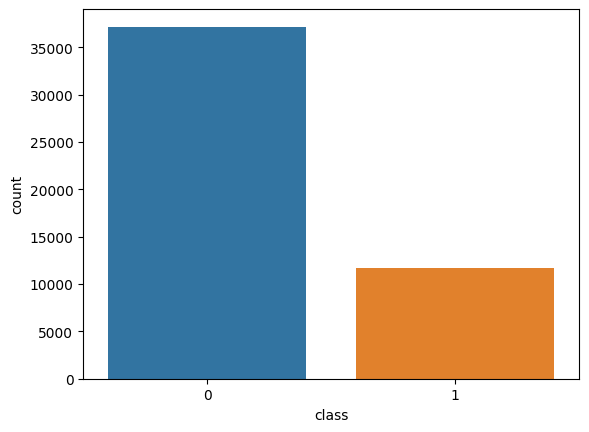

In [19]:
import seaborn as sns
sns.countplot(x='class', data=df)

In [50]:
# 모델 학습 및 예측
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# salary_class.csv 파일을 불러옵니다.
df = pd.read_csv('salary_class.csv')

# 결측치 처리 (앞서 언급한 대로 처리된 데이터셋을 활용합니다.)
df['workclass'].fillna('Unknown', inplace=True)
df['occupation'].fillna('Unknown', inplace=True)
df['native-country'].fillna('Unknown', inplace=True)

# Feature와 Label로 데이터를 나눕니다.
X = df.drop(['class'], axis=1)  # 입력 변수 (Feature)
y = df['class']  # 출력 변수 (Label)

# 범주형 변수들을 원-핫 인코딩으로 변환합니다.
X_encoded = pd.get_dummies(X)

# Train set과 Test set으로 데이터를 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Decision Tree 모델 객체를 생성하고 학습시킵니다.
model = DecisionTreeClassifier()
model_sp1 = DecisionTreeClassifier(random_state=111, max_depth=3)
model.fit(X_train, y_train) #모델 학습
model_sp1.fit(X_train, y_train) #모델 학습

pred_train = model.predict(X_train) #train 예측
pred_test = model.predict(X_test) # test예측

pred_train_sp = model_sp1.predict(X_train) #train 예측
pred_test_sp = model_sp1.predict(X_test) # test예측

In [51]:
# 정확도(accuracy)를 평가합니다.
print(accuracy_score(y_train, pred_train))
print(accuracy_score(y_test, pred_test))

1.0
0.8191217115364929


In [52]:
print(accuracy_score(y_train, pred_train_sp))
print(accuracy_score(y_test, pred_test_sp))

0.8423719704143526
0.8514689323369843


In [78]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# salary_class.csv 파일을 불러옵니다.
df = pd.read_csv('salary_class.csv')

# 결측치 처리 (앞서 언급한 대로 처리된 데이터셋을 활용합니다.)
df['workclass'].fillna('Unknown', inplace=True)
df['occupation'].fillna('Unknown', inplace=True)
df['native-country'].fillna('Unknown', inplace=True)

# Feature와 Label로 데이터를 나눕니다.
X = df.drop(['class'], axis=1)  # 입력 변수 (Feature)
y = df['class']  # 출력 변수 (Label)

# 범주형 변수들을 원-핫 인코딩으로 변환합니다.
X_encoded = pd.get_dummies(X)

# K-Fold 교차 검증 객체 생성
kfold = KFold(n_splits=5)

n_iter = 0  # 반복 횟수 초기화

cv_accuracy_train = []  # Train 정확도 저장 리스트
cv_accuracy_test = []   # Test 정확도 저장 리스트

for train_idx, test_idx in kfold.split(X_encoded):
    X_train_kf, X_test_kf = X_encoded.iloc[train_idx], X_encoded.iloc[test_idx]
    y_train_kf, y_test_kf = y.iloc[train_idx], y.iloc[test_idx]

    model_kf = DecisionTreeClassifier(random_state=111, max_depth=3)
    model_kf.fit(X_train_kf, y_train_kf)
    
    kf_pred_train = model_kf.predict(X_train_kf)
    kf_pred_test = model_kf.predict(X_test_kf)
    
    n_iter += 1
    
    accuracy_train = accuracy_score(y_train_kf,kf_pred_train)
    accuracy_test=accuracy_score(y_test_kf,kf_pred_test) 
   
   
    print(f"{n_iter}번째 train 교차 검증 정확도: {accuracy_train}, test 교차 검증 정확도: {accuracy}")
    
    cv_accuracy_train.append(accuracy_train) 
    cv_accuracy_test.append(accuracy_test) 
    
print("Train 평균 정확도:", np.mean(cv_accuracy_train))
print("Test 평균 정확도:", np.mean(cv_accuracy_test))


1번째 train 교차 검증 정확도: 0.8447521306272874, test 교차 검증 정확도: 0.8199406285187839
2번째 train 교차 검증 정확도: 0.8444194200598879, test 교차 검증 정확도: 0.8199406285187839
3번째 train 교차 검증 정확도: 0.8445001791472591, test 교차 검증 정확도: 0.8199406285187839
4번째 train 교차 검증 정확도: 0.8431437784716179, test 교차 검증 정확도: 0.8199406285187839
5번째 train 교차 검증 정확도: 0.8433229257306649, test 교차 검증 정확도: 0.8199406285187839
Train 평균 정확도: 0.8440276868073434
Test 평균 정확도: 0.8432087381493668
